In [1]:
from utils import *

# Load and read the JSON file to extract new parameters
json_path = 'french_polynesia.json'
with open(json_path, 'r') as file:
    df = json.load(file)
    
    
n = df['n'].copy()
outside_world = {'Outside World': n.pop('Outside World')}
sorted_data = {k: n[k] for k in sorted(n)}
locations = {**outside_world, **sorted_data}
links = df['Connectivity Matrix W'].copy()
ports = df['ports_according_communities'].copy()
print(links)
print(ports)
print(locations)

{'Outside World_AP,Tahiti_AP': 300, 'Outside World_FP,Tahiti_FP': 300, 'Bora Bora_AP,Fakarava_AP': 57, 'Bora Bora_AP,Huahine_AP': 237, 'Bora Bora_AP,Maupiti_AP': 38, 'Bora Bora_AP,Moorea_AP': 199, 'Bora Bora_AP,Raiatea_AP': 379, 'Bora Bora_AP,Rangiroa_AP': 133, "Bora Bora_FP,Taha'a_FP": 193, 'Bora Bora_AP,Tikehau_AP': 76, 'Moorea_AP,Huahine_AP': 75, 'Moorea_FP,Huahine_FP': 96, 'Moorea_AP,Raiatea_AP': 57, 'Nuku Hiva_AP,Hiva Oa_AP': 104, 'Nuku Hiva_AP,Ua Huka_AP': 123, 'Nuku Hiva_AP,Ua Pou_AP': 161, 'Raiatea_AP,Huahine_AP': 341, 'Raiatea_FP,Huahine_FP': 192, 'Raiatea_AP,Maupiti_AP': 133, 'Raiatea_AP,Rangiroa_AP': 9, "Raiatea_FP,Taha'a_FP": 193, 'Raiatea_AP,Tikehau_AP': 9, 'Rangiroa_AP,Fakarava_AP': 85, 'Rangiroa_AP,Mataiva_AP': 19, 'Rangiroa_AP,Tikehau_AP': 104, 'Rurutu_AP,Rimatara_AP': 38, 'Rurutu_AP,Tubuai_AP': 47, 'Tahiti_AP,Ahe_AP': 95, 'Tahiti_AP,Arutua_AP': 95, 'Tahiti_AP,Bora Bora_AP': 2238, 'Tahiti_AP,Fakarava_AP': 218, 'Tahiti_AP,Gambier_AP': 95, 'Tahiti_AP,Hao_AP': 133, 'Tahiti

In [2]:
import networkx as nx
# Re-map airport/port to locations
location_map = {}
for location, ap_fp_list in ports.items():
    for ap_fp in ap_fp_list:
        location_map[ap_fp] = location

# Re-aggregate connections based on locations, summing the volumes
G_locations = nx.Graph()
for line, volume in links.items():
    ports = line.split(',')
    location1 = location_map[ports[0]]
    location2 = location_map[ports[1]]

    # Check if the edge already exists and add the volume
    if G_locations.has_edge(location1, location2):
        G_locations[location1][location2]['volume'] += volume
    else:
        G_locations.add_edge(location1, location2, volume=volume)

In [3]:
# Output the new graph info again
print(G_locations.number_of_nodes())
print(G_locations.number_of_edges())
print(list(G_locations.edges(data=True))) # Show only first 5 edges for brevity

26
51
[('Outside World', 'Tahiti', {'volume': 600}), ('Tahiti', 'Ahe', {'volume': 95}), ('Tahiti', 'Arutua', {'volume': 95}), ('Tahiti', 'Bora Bora', {'volume': 2238}), ('Tahiti', 'Fakarava', {'volume': 218}), ('Tahiti', 'Gambier', {'volume': 95}), ('Tahiti', 'Hao', {'volume': 133}), ('Tahiti', 'Hiva Oa', {'volume': 306}), ('Tahiti', 'Huahine', {'volume': 96}), ('Tahiti', 'Makemo', {'volume': 104}), ('Tahiti', 'Manihi', {'volume': 95}), ('Tahiti', 'Mataiva', {'volume': 76}), ('Tahiti', 'Maupiti', {'volume': 284}), ('Tahiti', 'Moorea', {'volume': 5069}), ('Tahiti', 'Nuku Hiva', {'volume': 325}), ('Tahiti', 'Raiatea', {'volume': 1717}), ('Tahiti', 'Raivavae', {'volume': 76}), ('Tahiti', 'Rangiroa', {'volume': 726}), ('Tahiti', 'Rimatara', {'volume': 38}), ('Tahiti', 'Rurutu', {'volume': 227}), ('Tahiti', 'Tikehau', {'volume': 171}), ('Tahiti', 'Tubuai', {'volume': 246}), ('Tahiti', 'Ua Huka', {'volume': 114}), ('Tahiti', 'Ua Pou', {'volume': 123}), ('Bora Bora', 'Fakarava', {'volume': 57

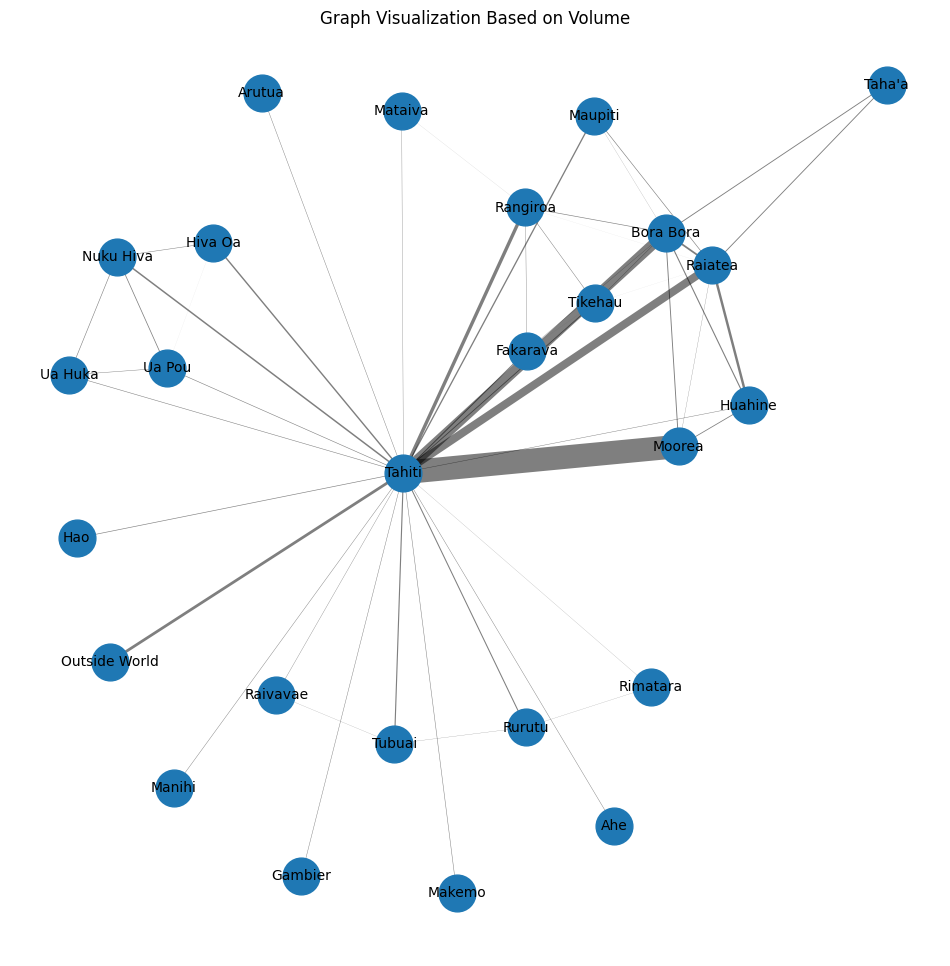

In [4]:
import matplotlib.pyplot as plt

# Create a plot with weighted edges where weights are represented by the 'volume' attribute
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_locations)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G_locations, pos, node_size=700)

# Draw edges with varying widths based on volume
for (u, v, d) in G_locations.edges(data=True):
    nx.draw_networkx_edges(G_locations, pos, edgelist=[(u, v)], width=d['volume']/300, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(G_locations, pos, font_size=10, font_family='sans-serif')

plt.title('Graph Visualization Based on Volume')
plt.axis('off')  # Turn off the axis
plt.show()


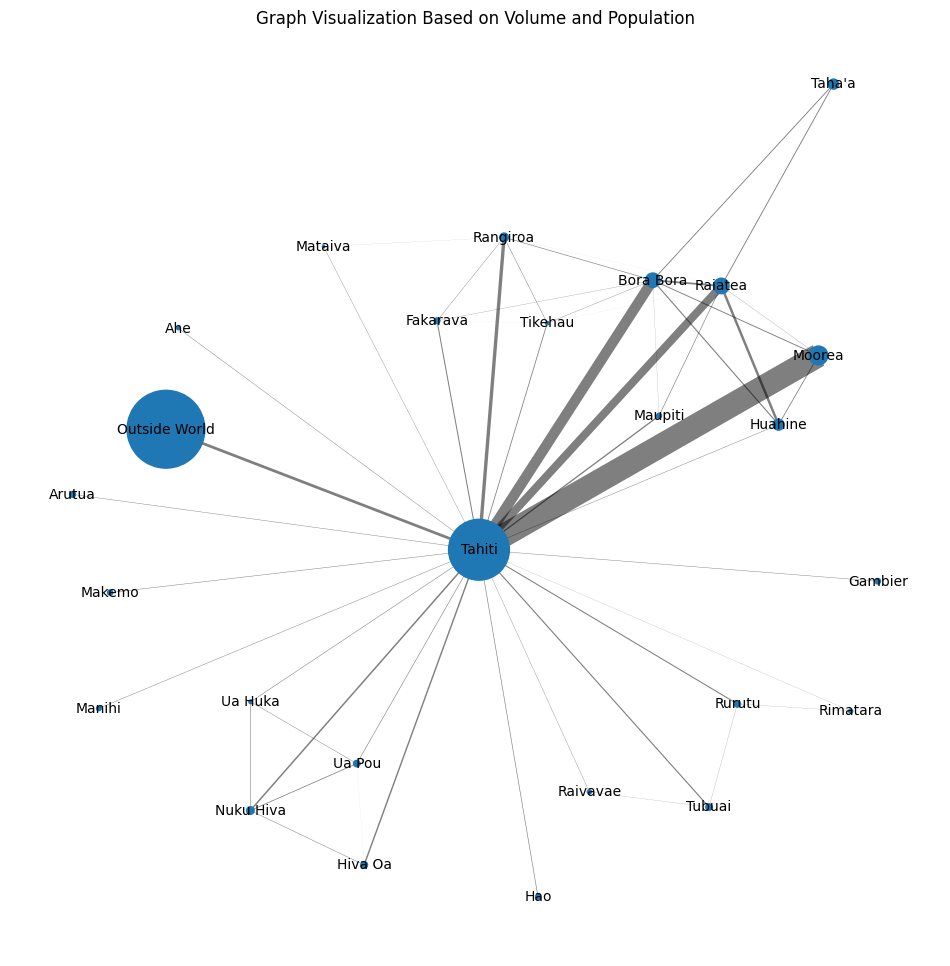

In [5]:
# Update the graph visualization to incorporate population size as node size

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_locations)  # positions for all nodes

# Calculate node sizes based on population
node_sizes = [locations[node] * 0.01 for node in G_locations.nodes()]  # Scale down for better visualization

# Draw nodes with size based on population
nx.draw_networkx_nodes(G_locations, pos, node_size=node_sizes)

# Draw edges with varying widths based on volume
for (u, v, d) in G_locations.edges(data=True):
    nx.draw_networkx_edges(G_locations, pos, edgelist=[(u, v)], width=d['volume']/300, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(G_locations, pos, font_size=10, font_family='sans-serif')

plt.title('Graph Visualization Based on Volume and Population')
plt.axis('off')  # Turn off the axis
plt.show()

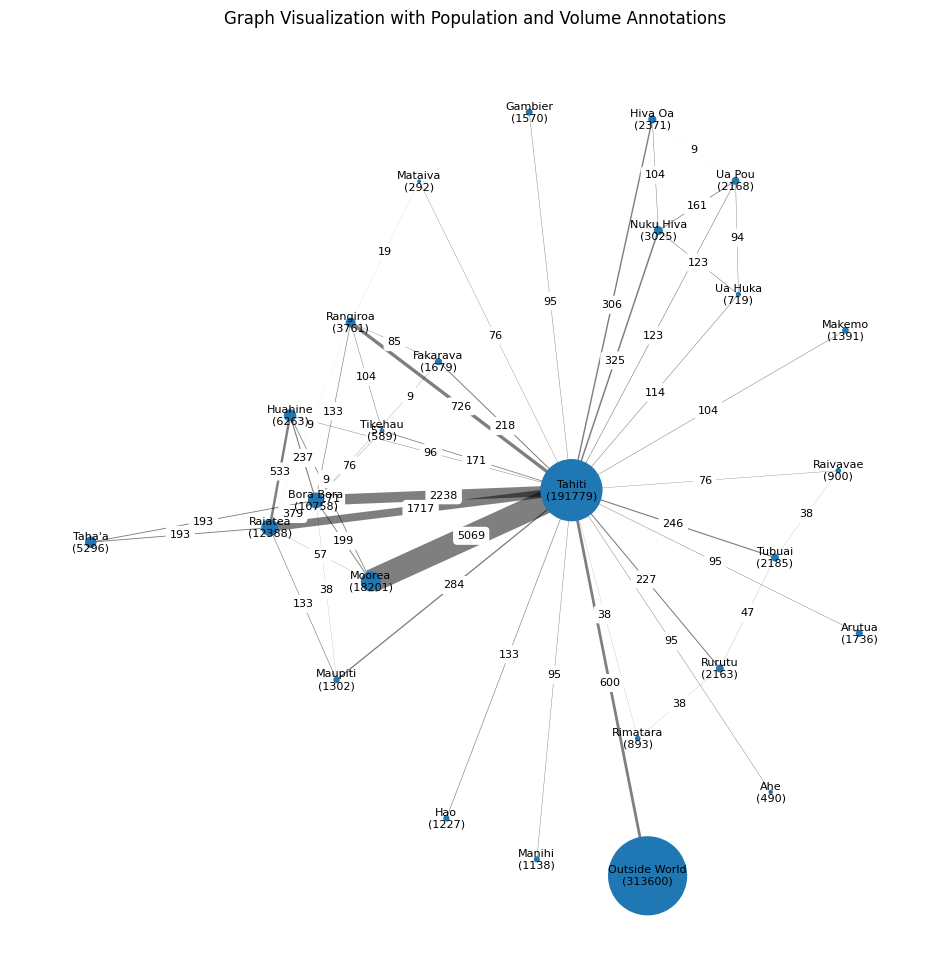

In [6]:
# Create a plot with annotations for both nodes and edges

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_locations)  # positions for all nodes

# Calculate node sizes based on population
node_sizes = [locations.get(node, 0) * 0.01 for node in G_locations.nodes()]  # Scale down for better visualization

# Draw nodes with size based on population
nx.draw_networkx_nodes(G_locations, pos, node_size=node_sizes)

# Draw edges with varying widths based on volume
edges = nx.draw_networkx_edges(G_locations, pos, edgelist=G_locations.edges(), width=[d['volume']/300 for u, v, d in G_locations.edges(data=True)], alpha=0.5)

# Draw labels for nodes with population
node_labels = {node: f"{node}\n({pop})" for node, pop in locations.items()}
nx.draw_networkx_labels(G_locations, pos, labels=node_labels, font_size=8)

# Add edge labels for volume
edge_labels = {(u, v): f"{d['volume']}" for u, v, d in G_locations.edges(data=True)}
nx.draw_networkx_edge_labels(G_locations, pos, edge_labels=edge_labels, font_size=8, rotate=False)

plt.title('Graph Visualization with Population and Volume Annotations')
plt.axis('off')  # Turn off the axis
plt.show()